In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
import yfinance as yahoofinance

In [12]:
data = pd.read_csv(f'Data.csv')

In [13]:
data

,Days,Date,Close,Open,High,Low,Volume,Unnamed: 7,ADBE
0,1,9/30/2021,575.72,580.64,586.19,573.24,2747916.0,NaN,"?=STOCKHISTORY(G1,""2021-09-30"",""2022-9-30"",0,,5)"
1,2,10/1/2021,577.47,577.52,581.47,568.61,2915254.0,NaN,NaN
2,3,10/4/2021,558.49,574.59,576.80,552.14,3976963.0,NaN,NaN
3,4,10/5/2021,566.70,563.91,570.29,559.21,2337838.0,NaN,NaN
4,5,10/6/2021,570.31,561.24,572.16,560.21,2043151.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
248,249,9/26/2022,276.96,286.03,288.90,276.75,6746157.0,NaN,NaN
249,250,9/27/2022,277.57,281.70,284.50,274.73,6390916.0,NaN,NaN
250,251,9/28/2022,281.40,280.38,282.74,275.37,4985056.0,NaN,NaN
251,252,9/29/2022,278.25,277.80,279.59,275.01,5155272.0,NaN,NaN


In [14]:
x = data.Days.values
y = data.Close.values

In [43]:
x = x.reshape(-1,1)
poly = PolynomialFeatures(degree=2)

In [44]:
x_poly = poly.fit_transform(x)

In [45]:
poly.fit(x_poly,y)

PolynomialFeatures()

In [46]:
linear = LinearRegression()

In [47]:
linear.fit(x_poly,y)

LinearRegression()

In [48]:
y_predict = linear.predict(x_poly)

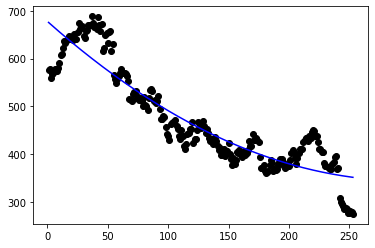

In [49]:
plt.scatter(x,y, color="black")
plt.plot(x, y_predict, color="blue")

In [50]:
r_squared = r2_score(y,y_predict)

In [51]:
print("r_squared valued: " ,r_squared)

r_squared valued:  0.8437815415119012


In [52]:
absolute_error = y_predict - y

In [53]:
table = pd.Series(absolute_error)
spread = pd.DataFrame(table)

In [54]:
spread

,0
0,99.746386
1,95.763055
2,112.517283
3,102.089069
4,96.268413
...,...
248,76.138888
249,75.170039
250,70.988749
251,73.795017


In [55]:
mean = spread.mean()
stdev = spread.std()
zscore = (spread - mean) / stdev

In [56]:
price_mean = data.Close.mean()
price_stdev = data.Close.std()
price_zscore = (data.Close - price_mean) / price_stdev

Text(0.5, 1.0, 'Spread')

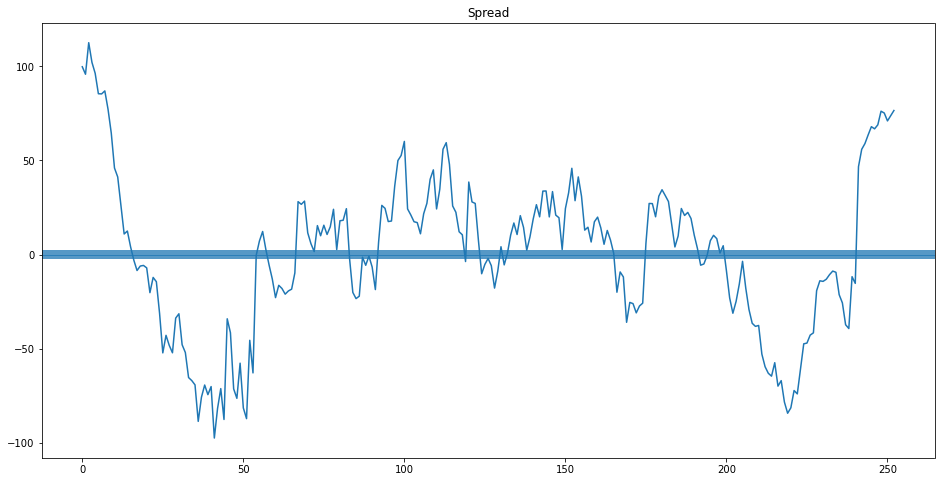

In [57]:
plt.figure(figsize=(16,8))
plt.plot(spread)
plt.axhline(2)
plt.axhline(1)
plt.axhline(0)
plt.axhline(-1)
plt.axhline(-2)
plt.title("Spread")

In [58]:
upper_band = y_predict + 50
lower_band = y_predict - 50

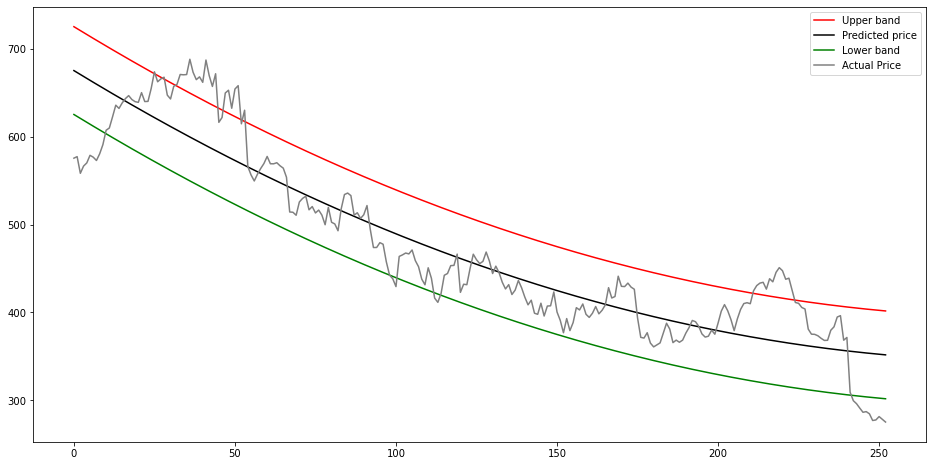

In [59]:
plt.figure(figsize=(16,8))
plt.plot(upper_band, color="red", label="Upper band")
plt.plot(y_predict, color="black", label="Predicted price")
plt.plot(lower_band, "green", label="Lower band")
plt.plot(data.Close, color="gray", label="Actual Price")
plt.legend()

In [60]:
volume = data.Volume

In [61]:
ratio = volume / volume.shift(1)
ratio_mean = ratio.mean()
ratio_stdev = ratio.std()
ratio_zscore = (ratio - ratio_mean) / ratio_stdev

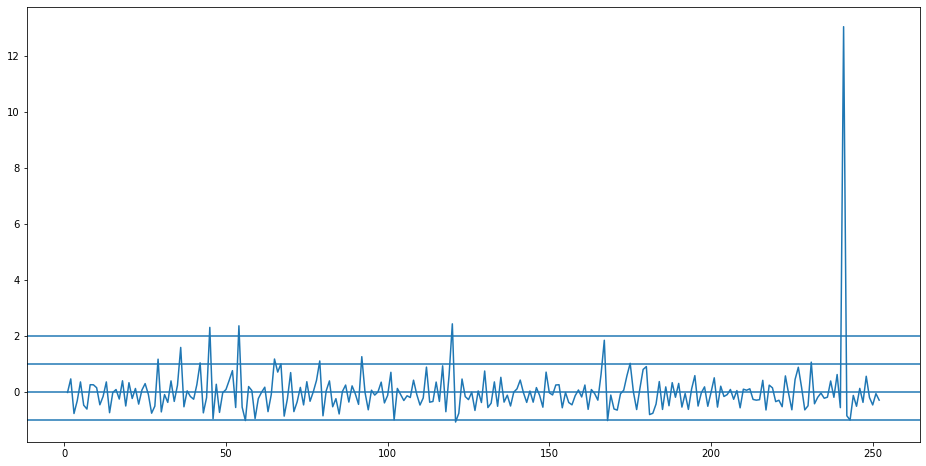

In [62]:
plt.figure(figsize=(16,8))
plt.axhline(-1)
plt.axhline(0)
plt.axhline(1)
plt.axhline(2)
plt.plot(ratio_zscore)

In [63]:
returns = data.Close - data.Close.shift(1)

In [64]:
returns.sort_values(inplace=True)

In [65]:
probability = data.Days / len(data.Days)

In [66]:
probability

0      0.003953
1      0.007905
2      0.011858
3      0.015810
4      0.019763
         ...   
248    0.984190
249    0.988142
250    0.992095
251    0.996047
252    1.000000
Name: Days, Length: 253, dtype: float64

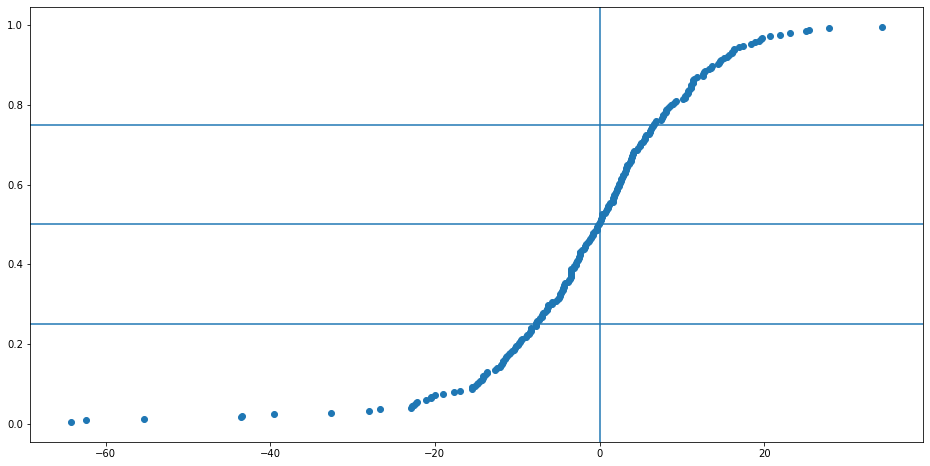

In [67]:
plt.figure(figsize=(16,8))
plt.scatter(returns,probability)
plt.axhline(.75)
plt.axhline(.5)
plt.axhline(.25)
plt.axvline(0)

In [68]:
info = yahoofinance.download("ADBE")
ticker = yahoofinance.Ticker("ADBE")
info = ticker.history(period='1y')

[*********************100%***********************]  1 of 1 completed


In [69]:
change = info.Close - info.Close.shift(1)

(array([ 3.,  0.,  3.,  3., 15., 54., 96., 55., 18.,  4.]),
 array([-64.23999023, -54.3789917 , -44.51799316, -34.65699463,
        -24.79599609, -14.93499756,  -5.07399902,   4.78699951,
         14.64799805,  24.50899658,  34.36999512]),
 <BarContainer object of 10 artists>)

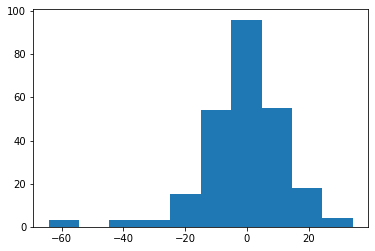

In [70]:
plt.hist(change)